In [1]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import rcParams
import textdistance

# IMPORTO DATAFRAME UNICAMENTE CON LAS FILAS CLASIFICADAS

In [2]:
df_me_data0=pd.read_csv('me_diet_data.csv')

In [3]:
df_me_data0

,Unnamed: 0,Group,Name,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
0,0,mixed salads,celeriac in remoulade sauce prepacked,0.00,78.50,1.12,4.19,12.80,2.38,0.0,...,28.00,0.080,25.20,0.0,0.0,0.500,3.40,0.00,0.0,GOOD
1,1,mixed salads,prepared mixed tuna and vegetable salad canne...,0.00,76.50,9.15,7.74,4.70,3.08,0.0,...,31.00,1.450,2.75,0.0,0.0,0.500,1.60,0.00,0.0,GOOD
2,2,mixed salads,prepared mixed meat/fish canned drained salad,0.00,76.70,8.06,6.40,5.30,1.90,0.0,...,11.10,1.230,0.00,0.0,0.0,0.440,2.04,9.75,0.0,GOOD
3,3,mixed salads,greek style marinated mushrooms,0.00,84.60,2.08,3.95,3.55,2.38,0.0,...,27.30,0.018,10.30,0.0,0.0,0.000,1.47,0.00,0.0,GOOD
4,4,mixed salads,prepared potatoes salad home made,0.00,76.00,2.68,9.90,8.20,0.00,0.0,...,7.00,0.000,10.00,0.0,0.0,0.000,0.00,0.00,0.0,GOOD
5,5,mixed salads,tabbouleh prepacked,0.00,66.40,4.29,22.20,5.65,3.82,0.0,...,17.00,0.000,14.50,0.0,0.0,0.000,1.68,0.00,0.0,BAD
6,6,mixed salads,potato salad piémontaise style prepacked,0.00,74.90,4.11,7.98,9.28,1.17,0.0,...,0.00,0.000,7.62,0.0,0.0,0.500,2.07,0.00,0.0,GOOD
7,7,mixed salads,prepared rice salad,0.00,72.50,5.13,16.10,4.35,1.00,0.0,...,33.50,0.430,4.48,0.0,0.0,0.500,1.63,0.00,0.0,GOOD
8,8,mixed salads,prepared pasta salad vegetarian,0.00,73.90,5.70,12.90,8.10,2.30,0.0,...,16.00,0.000,21.00,0.0,0.0,0.000,1.95,0.00,0.0,BAD
9,9,mixed salads,salad vegetable without dressing (average),22.30,93.70,1.03,2.50,0.53,2.01,0.0,...,39.30,0.000,14.60,0.0,0.0,0.074,0.47,45.30,0.0,GOOD


In [4]:
df_me_data=df_me_data0.drop(columns=['Unnamed: 0', 'Name'])

In [5]:
display(df_me_data)

,Group,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,Glucose,Fructose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
0,mixed salads,0.00,78.50,1.12,4.19,12.80,2.38,0.0,0.0,0.0,...,28.00,0.080,25.20,0.0,0.0,0.500,3.40,0.00,0.0,GOOD
1,mixed salads,0.00,76.50,9.15,7.74,4.70,3.08,0.0,0.0,0.0,...,31.00,1.450,2.75,0.0,0.0,0.500,1.60,0.00,0.0,GOOD
2,mixed salads,0.00,76.70,8.06,6.40,5.30,1.90,0.0,0.0,0.0,...,11.10,1.230,0.00,0.0,0.0,0.440,2.04,9.75,0.0,GOOD
3,mixed salads,0.00,84.60,2.08,3.95,3.55,2.38,0.0,0.0,0.0,...,27.30,0.018,10.30,0.0,0.0,0.000,1.47,0.00,0.0,GOOD
4,mixed salads,0.00,76.00,2.68,9.90,8.20,0.00,0.0,0.0,0.0,...,7.00,0.000,10.00,0.0,0.0,0.000,0.00,0.00,0.0,GOOD
5,mixed salads,0.00,66.40,4.29,22.20,5.65,3.82,0.0,0.0,0.0,...,17.00,0.000,14.50,0.0,0.0,0.000,1.68,0.00,0.0,BAD
6,mixed salads,0.00,74.90,4.11,7.98,9.28,1.17,0.0,0.0,0.0,...,0.00,0.000,7.62,0.0,0.0,0.500,2.07,0.00,0.0,GOOD
7,mixed salads,0.00,72.50,5.13,16.10,4.35,1.00,0.0,0.0,0.0,...,33.50,0.430,4.48,0.0,0.0,0.500,1.63,0.00,0.0,GOOD
8,mixed salads,0.00,73.90,5.70,12.90,8.10,2.30,0.0,0.0,0.0,...,16.00,0.000,21.00,0.0,0.0,0.000,1.95,0.00,0.0,BAD
9,mixed salads,22.30,93.70,1.03,2.50,0.53,2.01,0.0,0.0,0.0,...,39.30,0.000,14.60,0.0,0.0,0.074,0.47,45.30,0.0,GOOD


In [6]:
df_me_data['ME_CLASSIFIED'].value_counts()

GOOD        2171
BAD          800
NEUTRALS     168
Name: ME_CLASSIFIED, dtype: int64

In [7]:
from sklearn import preprocessing
labels= df_me_data['Group']

In [8]:
encoder=preprocessing.LabelEncoder()
df_me_data['Group']=encoder.fit_transform(labels)


In [9]:
numeric_dict={'GOOD':1,'NEUTRALS':0,'BAD':-1}
df_me_data['ME_CLASSIFIED']=df_me_data['ME_CLASSIFIED'].map(numeric_dict)

In [10]:
df_me_data

,Group,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,Glucose,Fructose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
0,51,0.00,78.50,1.12,4.19,12.80,2.38,0.0,0.0,0.0,...,28.00,0.080,25.20,0.0,0.0,0.500,3.40,0.00,0.0,1
1,51,0.00,76.50,9.15,7.74,4.70,3.08,0.0,0.0,0.0,...,31.00,1.450,2.75,0.0,0.0,0.500,1.60,0.00,0.0,1
2,51,0.00,76.70,8.06,6.40,5.30,1.90,0.0,0.0,0.0,...,11.10,1.230,0.00,0.0,0.0,0.440,2.04,9.75,0.0,1
3,51,0.00,84.60,2.08,3.95,3.55,2.38,0.0,0.0,0.0,...,27.30,0.018,10.30,0.0,0.0,0.000,1.47,0.00,0.0,1
4,51,0.00,76.00,2.68,9.90,8.20,0.00,0.0,0.0,0.0,...,7.00,0.000,10.00,0.0,0.0,0.000,0.00,0.00,0.0,1
5,51,0.00,66.40,4.29,22.20,5.65,3.82,0.0,0.0,0.0,...,17.00,0.000,14.50,0.0,0.0,0.000,1.68,0.00,0.0,-1
6,51,0.00,74.90,4.11,7.98,9.28,1.17,0.0,0.0,0.0,...,0.00,0.000,7.62,0.0,0.0,0.500,2.07,0.00,0.0,1
7,51,0.00,72.50,5.13,16.10,4.35,1.00,0.0,0.0,0.0,...,33.50,0.430,4.48,0.0,0.0,0.500,1.63,0.00,0.0,1
8,51,0.00,73.90,5.70,12.90,8.10,2.30,0.0,0.0,0.0,...,16.00,0.000,21.00,0.0,0.0,0.000,1.95,0.00,0.0,-1
9,51,22.30,93.70,1.03,2.50,0.53,2.01,0.0,0.0,0.0,...,39.30,0.000,14.60,0.0,0.0,0.074,0.47,45.30,0.0,1


# DIVIDIENDO LOS DATOS PARA EL SUPERVISADO

In [11]:
X=df_me_data[['Group', 'Calories', 'Water', 'Protein', 'Carbohydrates', 'Fat',
       'Sugar', 'Sucrose', 'Glucose', 'Fructose', 'Lactose', 'Maletose',
       'Starch', 'Fiber', 'Polyols', 'Ash', 'Alcohol', 'Organic_Acids',
       'Saturated_Fat', 'Fat_Mono.', 'Fat_Poly.', 'DHA', 'Cholesterol', 'Salt',
       'Calcium', 'Choline', 'Cupper', 'Iron', 'Iodine', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium', 'Zinc',
       'Retinol', 'Alpha_Carotene', 'Beta_Carotene', 'Caffeine', 'Theobromine',
       'Galactose', 'Fluoride', 'Beta_Cryptoxanthin', 'Lycopene',
       'Lutein&Zeaxathin', 'Vitamin A', 'Vitamin_B1', 'Vitamin_B2',
       'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6', 'Vitamin_B9', 'Vitamin_B12',
       'Vitamin_C', 'Vitamin_D2', 'Vitamin_D3', 'Vitamin_D', 'Vitamin_E',
       'Vitamin_K1', 'Vitamin_K2']]
y=df_me_data['ME_CLASSIFIED']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
y_train.value_counts()

 1    1744
-1     640
 0     127
Name: ME_CLASSIFIED, dtype: int64

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [15]:
from sklearn.model_selection import RandomizedSearchCV


In [16]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

# RANDOM FOREST CLASSIFIER

In [17]:
randomforest = RandomForestClassifier(n_estimators = 1500, criterion = 'entropy', random_state = 42)
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [18]:
y_pred=randomforest.predict(X_test)

In [19]:
randomforest.score(X_test, y_test)

0.8901273885350318

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc=metrics.auc(fpr, tpr)
roc_auc

0.863883160310858

In [21]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

IndexError: invalid index to scalar variable.

<Figure size 432x288 with 0 Axes>

In [22]:
df_no_clas0=pd.read_csv('me_diet_EMPTY.csv')

In [23]:
df_no_clas0.head()

,Unnamed: 0,Group,Name,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,...,Vitamin_B6,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2
0,12,mixed salads,coleslaw w sauce prepacked,105.0,80.4,0.94,5.78,8.10,4.72,0.0,...,0.093,14.6,0.000,21.60,0.0,0.0,0.25,2.21,23.00,0.0
1,18,soup,soup leek and potato prepacked to be reheated,37.1,90.8,0.79,4.46,1.51,0.81,0.0,...,0.230,29.3,0.045,7.95,0.0,0.0,0.00,0.28,9.13,0.0
2,23,soup,soup chorba frik w meat and frik,62.9,85.1,3.75,5.40,2.50,0.90,0.0,...,0.070,16.0,0.110,3.20,0.0,0.0,0.02,0.60,0.00,0.0
3,26,soup,soup asian style with noodles dehydrated and...,29.8,93.3,0.97,5.25,0.44,1.21,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0
4,27,soup,soup moroccan dehydrated and reconstituted,34.3,90.0,1.20,5.77,0.55,1.49,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0


In [24]:
df_no_clas=df_no_clas0.drop(columns=['Unnamed: 0', 'Name'])

In [25]:
df_no_clas

,Group,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,Glucose,Fructose,...,Vitamin_B6,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2
0,mixed salads,105.0,80.40,0.94,5.78,8.10,4.72,0.0,0.00,0.00,...,0.093,14.60,0.000,21.60,0.0,0.0,0.25,2.21,23.00,0.0
1,soup,37.1,90.80,0.79,4.46,1.51,0.81,0.0,0.00,0.00,...,0.230,29.30,0.045,7.95,0.0,0.0,0.00,0.28,9.13,0.0
2,soup,62.9,85.10,3.75,5.40,2.50,0.90,0.0,0.00,0.00,...,0.070,16.00,0.110,3.20,0.0,0.0,0.02,0.60,0.00,0.0
3,soup,29.8,93.30,0.97,5.25,0.44,1.21,0.0,0.00,0.00,...,0.000,0.00,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0
4,soup,34.3,90.00,1.20,5.77,0.55,1.49,0.0,0.00,0.00,...,0.000,0.00,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0
5,soup,26.1,92.80,0.63,4.84,0.41,0.91,0.0,0.00,0.00,...,0.000,0.00,0.000,30.00,0.0,0.0,0.00,0.00,0.00,0.0
6,soup,22.3,0.00,0.70,3.40,0.50,0.50,0.0,0.00,0.00,...,0.000,0.00,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0
7,soup,32.8,91.10,0.65,3.38,1.62,2.32,0.0,0.00,0.00,...,0.041,5.00,0.000,1.98,0.0,0.0,0.25,1.31,52.60,0.0
8,soup,37.3,90.80,1.22,4.51,1.37,1.62,0.0,0.00,0.00,...,0.110,15.90,0.220,5.19,0.0,0.0,0.00,0.48,6.87,0.0
9,dishes,145.0,0.00,9.55,10.20,7.30,0.00,0.0,0.00,0.00,...,0.000,0.00,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0


In [26]:

labels= df_no_clas['Group']

In [27]:
encoder=preprocessing.LabelEncoder()
df_no_clas['Group']=encoder.fit_transform(labels)

In [28]:
df_no_clas.head()

,Group,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,Glucose,Fructose,...,Vitamin_B6,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2
0,53,105.0,80.4,0.94,5.78,8.10,4.72,0.0,0.0,0.0,...,0.093,14.6,0.000,21.60,0.0,0.0,0.25,2.21,23.00,0.0
1,71,37.1,90.8,0.79,4.46,1.51,0.81,0.0,0.0,0.0,...,0.230,29.3,0.045,7.95,0.0,0.0,0.00,0.28,9.13,0.0
2,71,62.9,85.1,3.75,5.40,2.50,0.90,0.0,0.0,0.0,...,0.070,16.0,0.110,3.20,0.0,0.0,0.02,0.60,0.00,0.0
3,71,29.8,93.3,0.97,5.25,0.44,1.21,0.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0
4,71,34.3,90.0,1.20,5.77,0.55,1.49,0.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0


In [29]:
prediccion=randomforest.predict(df_no_clas)

In [30]:
df_prediccion=pd.DataFrame(prediccion)
df_prediccion

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [31]:
df_no_clas0['ME_CLASSIFIED']=prediccion

In [32]:
df_no_clas0[50:100]

,Unnamed: 0,Group,Name,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
50,251,savoury pastries and other starters,samosas or samoosas,237.0,55.2,9.33,18.10,13.70,2.670,0.0,...,20.00,0.34,0.70,0.0,0.0,0.50,1.450,0.00,0.0,1
51,253,savoury pastries and other starters,chinese specialty or dumplings,141.0,64.6,5.90,26.00,1.40,3.900,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.00,0.0,-1
52,254,savoury pastries and other starters,snails in puff pastry,321.0,0.0,6.69,23.10,22.10,1.090,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.00,0.0,-1
53,256,savoury pastries and other starters,meat in puff pastry,354.0,37.1,9.59,27.30,22.60,1.230,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.00,0.0,-1
54,258,savoury pastries and other starters,croissant filled with ham,246.0,54.0,7.90,20.10,14.60,2.600,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.00,0.0,-1
55,259,savoury pastries and other starters,spring roll,109.0,73.9,4.57,18.00,1.82,3.600,0.0,...,16.00,0.16,1.50,0.0,0.0,0.00,0.180,0.00,0.0,-1
56,260,savoury pastries and other starters,egg roll or nem,224.0,54.8,6.48,23.10,11.20,3.020,0.0,...,23.10,0.22,0.50,0.0,0.0,0.50,0.820,0.00,0.0,1
57,266,savoury pastries and other starters,puff pastry savoury (average),307.0,42.9,7.53,28.60,17.70,2.650,0.0,...,7.24,0.52,0.34,0.0,0.0,1.18,1.490,0.00,0.0,-1
58,267,savoury pastries and other starters,vol au vent filled (average),217.0,59.6,7.13,17.10,13.00,2.540,0.0,...,10.20,1.06,0.53,0.0,0.0,0.62,1.210,0.00,0.0,1
59,269,savoury pastries and other starters,egg roll or nem with pork cooked,237.0,53.6,6.88,22.60,12.70,1.900,0.0,...,32.30,0.18,0.50,0.0,0.0,0.25,2.330,1.58,0.0,1


In [33]:
frames = [df_me_data0, df_no_clas0]

result = pd.concat(frames)

In [34]:
category_dict={1:'GOOD',0:'NEUTRALS',-1:'BAD', 'GOOD':'GOOD', 'BAD':'BAD', 'NEUTRALS':'NEUTRALS'}
result['ME_CLASSIFIED']=result['ME_CLASSIFIED'].map(category_dict)

In [35]:
result=result.reset_index(drop=True)

In [36]:
result.columns

Index(['Unnamed: 0', 'Group', 'Name', 'Calories', 'Water', 'Protein',
       'Carbohydrates', 'Fat', 'Sugar', 'Sucrose', 'Glucose', 'Fructose',
       'Lactose', 'Maletose', 'Starch', 'Fiber', 'Polyols', 'Ash', 'Alcohol',
       'Organic_Acids', 'Saturated_Fat', 'Fat_Mono.', 'Fat_Poly.', 'DHA',
       'Cholesterol', 'Salt', 'Calcium', 'Choline', 'Cupper', 'Iron', 'Iodine',
       'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium',
       'Sodium', 'Zinc', 'Retinol', 'Alpha_Carotene', 'Beta_Carotene',
       'Caffeine', 'Theobromine', 'Galactose', 'Fluoride',
       'Beta_Cryptoxanthin', 'Lycopene', 'Lutein&Zeaxathin', 'Vitamin A',
       'Vitamin_B1', 'Vitamin_B2', 'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6',
       'Vitamin_B9', 'Vitamin_B12', 'Vitamin_C', 'Vitamin_D2', 'Vitamin_D3',
       'Vitamin_D', 'Vitamin_E', 'Vitamin_K1', 'Vitamin_K2', 'ME_CLASSIFIED'],
      dtype='object')

In [37]:
result=result.drop(columns=['Unnamed: 0'])

# DATA TOTALMENTE LIMPIOS Y CLASIFICADOS

result[['Calories', 'Water', 'Protein', 'Carbohydrates', 'Fat',
       'Sugar', 'Sucrose', 'Glucose', 'Fructose', 'Lactose', 'Maletose',
       'Starch', 'Fiber', 'Polyols', 'Ash', 'Alcohol', 'Organic_Acids',
       'Saturated_Fat', 'Fat_Mono.', 'Fat_Poly.', 'DHA', 'Cholesterol', 'Salt',
       'Calcium', 'Choline', 'Cupper', 'Iron', 'Iodine', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium', 'Zinc',
       'Retinol', 'Alpha_Carotene', 'Beta_Carotene', 'Caffeine', 'Theobromine',
       'Galactose', 'Fluoride', 'Beta_Cryptoxanthin', 'Lycopene',
       'Lutein&Zeaxathin', 'Vitamin A', 'Vitamin_B1', 'Vitamin_B2',
       'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6', 'Vitamin_B9', 'Vitamin_B12',
       'Vitamin_C', 'Vitamin_D2', 'Vitamin_D3', 'Vitamin_D', 'Vitamin_E',
       'Vitamin_K1', 'Vitamin_K2']]=result[['Calories', 'Water', 'Protein', 'Carbohydrates', 'Fat',
       'Sugar', 'Sucrose', 'Glucose', 'Fructose', 'Lactose', 'Maletose',
       'Starch', 'Fiber', 'Polyols', 'Ash', 'Alcohol', 'Organic_Acids',
       'Saturated_Fat', 'Fat_Mono.', 'Fat_Poly.', 'DHA', 'Cholesterol', 'Salt',
       'Calcium', 'Choline', 'Cupper', 'Iron', 'Iodine', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium', 'Zinc',
       'Retinol', 'Alpha_Carotene', 'Beta_Carotene', 'Caffeine', 'Theobromine',
       'Galactose', 'Fluoride', 'Beta_Cryptoxanthin', 'Lycopene',
       'Lutein&Zeaxathin', 'Vitamin A', 'Vitamin_B1', 'Vitamin_B2',
       'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6', 'Vitamin_B9', 'Vitamin_B12',
       'Vitamin_C', 'Vitamin_D2', 'Vitamin_D3', 'Vitamin_D', 'Vitamin_E',
       'Vitamin_K1', 'Vitamin_K2']].astype(float) 

In [38]:
result

,Group,Name,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,Glucose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
0,mixed salads,celeriac in remoulade sauce prepacked,0.00,78.50,1.12,4.19,12.80,2.38,0.0,0.00,...,28.00,0.080,25.20,0.0,0.0,0.500,3.40,0.00,0.0,GOOD
1,mixed salads,prepared mixed tuna and vegetable salad canne...,0.00,76.50,9.15,7.74,4.70,3.08,0.0,0.00,...,31.00,1.450,2.75,0.0,0.0,0.500,1.60,0.00,0.0,GOOD
2,mixed salads,prepared mixed meat/fish canned drained salad,0.00,76.70,8.06,6.40,5.30,1.90,0.0,0.00,...,11.10,1.230,0.00,0.0,0.0,0.440,2.04,9.75,0.0,GOOD
3,mixed salads,greek style marinated mushrooms,0.00,84.60,2.08,3.95,3.55,2.38,0.0,0.00,...,27.30,0.018,10.30,0.0,0.0,0.000,1.47,0.00,0.0,GOOD
4,mixed salads,prepared potatoes salad home made,0.00,76.00,2.68,9.90,8.20,0.00,0.0,0.00,...,7.00,0.000,10.00,0.0,0.0,0.000,0.00,0.00,0.0,GOOD
5,mixed salads,tabbouleh prepacked,0.00,66.40,4.29,22.20,5.65,3.82,0.0,0.00,...,17.00,0.000,14.50,0.0,0.0,0.000,1.68,0.00,0.0,BAD
6,mixed salads,potato salad piémontaise style prepacked,0.00,74.90,4.11,7.98,9.28,1.17,0.0,0.00,...,0.00,0.000,7.62,0.0,0.0,0.500,2.07,0.00,0.0,GOOD
7,mixed salads,prepared rice salad,0.00,72.50,5.13,16.10,4.35,1.00,0.0,0.00,...,33.50,0.430,4.48,0.0,0.0,0.500,1.63,0.00,0.0,GOOD
8,mixed salads,prepared pasta salad vegetarian,0.00,73.90,5.70,12.90,8.10,2.30,0.0,0.00,...,16.00,0.000,21.00,0.0,0.0,0.000,1.95,0.00,0.0,BAD
9,mixed salads,salad vegetable without dressing (average),22.30,93.70,1.03,2.50,0.53,2.01,0.0,0.00,...,39.30,0.000,14.60,0.0,0.0,0.074,0.47,45.30,0.0,GOOD


# ALGORITMO DE CONSULTA AL RESULTADO

import textdistance
    
def consulta(kw):
    metric = textdistance.cosine.distance
    scores = enumerate(map(lambda x :metric(kw,x), lst)) 
    scores = sorted(scores, key=lambda x:x[1]) 
    index, score = scores[0] 
    return 'Select one of this dishes:', list(map(lambda x: (lst[x[0]], x[1]), scores))[:10]

def filtro1(kw):    
    lst = result['Name']
    for i in lst:
        if kw in i:
            return consulta(kw)
        else: return '{} is not in our database, please ask for other food'.format(kw)

    
filtro1("sugar")

def generateScores(kw, lst):
   
    score=textdistance.cosine(kw, lst)
    return score,lst

def filtro2(kw, lst):
    for i in lst:
        if kw in i:
            return generateScores(kw, lst)
    else: return '{} is not in our database, please ask for other food'.format(kw)

lst = result['Name']          
filtro2("sugar", lst)

In [97]:
def filtro(kw, column):
    rdo=[]
    for i in column:
        if kw in i:
            rdo.append(i)
    return rdo

column=result['Name']
inputo='meatballs'

filtro(inputo, column)

['meatballs  frozen  italian style',
 'morningstar farms meal starters veggie meatballs  frozen  unprepared',
 'meatballs  meatless']

In [102]:
def consulta(kw, lista):
    metric = textdistance.cosine.distance
    scores = enumerate(map(lambda x :metric(kw,x), lista)) 
    scores = sorted(scores, key=lambda x:x[1])
    mejor= list(map(lambda x: (lista[x[0]], x[1]), scores))[:5]
    return mejor
consulta(inputo,lista)

lista = filtro(inputo, column)
resultado = consulta(inputo, lista)

res = [alimento for alimento, score in resultado][0]
res


'meatballs  meatless'

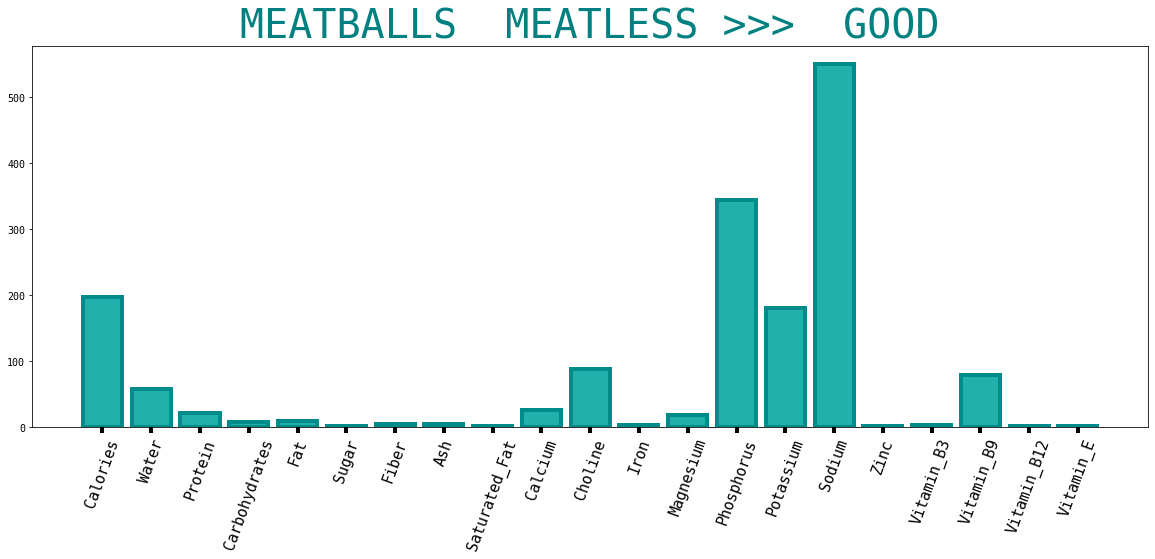

In [103]:
def plotter_selected (res, df, column):
    row=df[column==res]
    row.reset_index(inplace=True,drop=True)
    lst=[]
    keys=[]
    for i in range(len(row.columns)-3):
        if float(row[row.columns[i+2]])>1:
            lst.append((row[row.columns[i+2]][0]))
            keys.append(row.columns[i+2])

    f, ax = plt.subplots(figsize=(20,7))
    plt.bar(keys,lst, edgecolor= '#008B8B', color='#20B2AA', linewidth='4')
    plt.rcParams['font.sans-serif'] = "Courier New"
    plt.rcParams['font.family'] = "monospace"
    ax.tick_params(axis='x', rotation=70, length=6, width=4, labelsize=15)
    a = [row.Name[0].upper(), row.ME_CLASSIFIED[0]]
    plt.title(' >>>  '.join(map(str,a)), fontsize=40, color='#008080')
    grafico_resultado=plt.show();
    return grafico_resultado

plotter_selected(res, result, column)        

In [ ]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [ ]:
result[column.str.contains(res)]

In [ ]:
clasificacion=prueba_fila['ME_CLASSIFIED']
print(clasificacion)

In [ ]:
prueba_fila.reset_index(inplace=True,drop=True)
lst=[]
keys=[]
for i in range(len(prueba_fila.columns)-3):
    if float(prueba_fila[prueba_fila.columns[i+2]])!=0 :
        lst.append((prueba_fila[prueba_fila.columns[i+2]][0]))
        keys.append(prueba_fila.columns[i+2])
lst
    #else: lst.append
plt.bar(keys,lst)
plt.title((prueba_fila.Name[0],prueba_fila.ME_CLASSIFIED[0]))
#prueba_fila
plt.show();

In [ ]:
lst = result['Name'] 

In [ ]:
for i in lst:
    if "sugar" in i:
        print(i)

# PROBANDO Neural Network Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

# PROBANDO Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

linearsvc = LinearSVC(random_state=20, tol=1e-5)

In [ ]:
linearsvc.fit(X_train, y_train)

In [ ]:
y_pred=linearsvc.predict(X_test)

In [ ]:
linearsvc.score(X_train, y_train)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

# INTENTANDO SEMI SUPERVISADO

In [ ]:
DIET_TO_PREDICT=pd.read_csv('me_diet_TO_PREDICT.csv')

In [ ]:
DIET_TO_PREDICT

In [ ]:
DIET_TO_PREDICT.drop(columns=['Unnamed: 0', 'Name'], inplace=True)

In [ ]:
from sklearn import preprocessing
labels= DIET_TO_PREDICT['Group']

In [ ]:
encoder=preprocessing.LabelEncoder()
DIET_TO_PREDICT['Group']=encoder.fit_transform(labels)

In [ ]:
numeric_dict={'GOOD':2,'NEUTRALS':1,'BAD':0}
DIET_TO_PREDICT['ME_CLASSIFIED']=DIET_TO_PREDICT['ME_CLASSIFIED'].map(numeric_dict)

In [ ]:
DIET_TO_PREDICT.columns

In [ ]:
DIET_TO_PREDICT1=DIET_TO_PREDICT[['Group', 'Calories', 'Water', 'Protein', 'Carbohydrates', 'Fat',
       'Sugar', 'Sucrose', 'Glucose', 'Fructose', 'Lactose', 'Maletose',
       'Starch', 'Fiber', 'Polyols', 'Ash', 'Alcohol', 'Organic_Acids',
       'Saturated_Fat', 'Fat_Mono.', 'Fat_Poly.', 'DHA', 'Cholesterol', 'Salt',
       'Calcium', 'Choline', 'Cupper', 'Iron', 'Iodine', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium', 'Zinc',
       'Retinol', 'Alpha_Carotene', 'Beta_Carotene', 'Caffeine', 'Theobromine',
       'Galactose', 'Fluoride', 'Beta_Cryptoxanthin', 'Lycopene',
       'Lutein&Zeaxathin', 'Vitamin A', 'Vitamin_B1', 'Vitamin_B2',
       'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6', 'Vitamin_B9', 'Vitamin_B12',
       'Vitamin_C', 'Vitamin_D2', 'Vitamin_D3', 'Vitamin_D', 'Vitamin_E',
       'Vitamin_K1', 'Vitamin_K2']]
DIET_CLASSIFICATION=DIET_TO_PREDICT['ME_CLASSIFIED']

# UMAP

In [ ]:
from umap import UMAP

In [ ]:
def get_umap(dataset, n_components):
 
    umap = UMAP(n_components=n_components, random_state=42)
    embedding = umap.fit_transform(dataset)

    return pd.DataFrame(embedding, columns=[f'emb_{i+1}' for i in range(n_components)])
    

In [ ]:
umap_df = get_umap(DIET_TO_PREDICT1, 2)
umap_df.head()

In [ ]:

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(umap_df['emb_1'], umap_df['emb_2'],c=DIET_CLASSIFICATION, alpha=1.0)

#plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

In [ ]:
umap_df['to_predict']=DIET_CLASSIFICATION

In [ ]:
umap_df1=umap_df[umap_df['to_predict'].notnull()]

In [ ]:
umap_df1

# KMEANS AFTER UMAP

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(umap_df1)


In [ ]:
DIET_TO_PREDICT.dtypes

In [ ]:
DIET_TO_PREDICT['ME_CLASSIFIED']=pd.to_numeric(DIET_TO_PREDICT['ME_CLASSIFIED'])

In [ ]:
X=DIET_TO_PREDICT[['Group', 'Calories', 'Water', 'Protein', 'Carbohydrates', 'Fat',
       'Sugar', 'Sucrose', 'Glucose', 'Fructose', 'Lactose', 'Maletose',
       'Starch', 'Fiber', 'Polyols', 'Ash', 'Alcohol', 'Organic_Acids',
       'Saturated_Fat', 'Fat_Mono.', 'Fat_Poly.', 'DHA', 'Cholesterol', 'Salt',
       'Calcium', 'Choline', 'Cupper', 'Iron', 'Iodine', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium', 'Zinc',
       'Retinol', 'Alpha_Carotene', 'Beta_Carotene', 'Caffeine', 'Theobromine',
       'Galactose', 'Fluoride', 'Beta_Cryptoxanthin', 'Lycopene',
       'Lutein&Zeaxathin', 'Vitamin A', 'Vitamin_B1', 'Vitamin_B2',
       'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6', 'Vitamin_B9', 'Vitamin_B12',
       'Vitamin_C', 'Vitamin_D2', 'Vitamin_D3', 'Vitamin_D', 'Vitamin_E',
       'Vitamin_K1', 'Vitamin_K2']]

y=DIET_TO_PREDICT['ME_CLASSIFIED']
 

In [ ]:
masked_target = DIET_TO_PREDICT['ME_CLASSIFIED'].fillna(-1)
masked_target

In [ ]:
masked_target.value_counts()

In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    embedding = UMAP().fit_transform(X, y=masked_target)
    umap_df = pd.DataFrame(embedding, columns=['emb_1', 'emb_2'])

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c=y, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(3))
plt.title('UMAP projection of the Digits dataset', fontsize=12);

In [ ]:
embedding

In [ ]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3)
kmeans.fit(umap_df)

In [ ]:
kmeans.cluster_centers_

In [ ]:
DIET_TO_PREDICT['ME_CLASSIFIED']=kmeans.predict(umap_df)

In [ ]:
DIET_TO_PREDICT

In [ ]:
from hdbscan import HDBSCAN

hdbscan = HDBSCAN()

In [ ]:
predictions = hdbscan.fit_predict(umap_df)
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c=predictions, cmap='Spectral', s=3)

In [ ]:
len(df_me_data)

In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    embedding = UMAP(random_state=42).fit_transform(X)
    umap_df = pd.DataFrame(embedding, columns=['emb_1', 'emb_2'])


In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c=kmeans.labels_, cmap='Spectral', s=5)
plt.title('UMAP projection of the Digits dataset', fontsize=12);

In [ ]:
y.value_counts()

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=6)
kmeans.fit(umap_df)